In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
hf=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
hf.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
hf.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
hf['Age'].fillna(hf['Age'].mean(),inplace=True)

In [ ]:
hf.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
hf.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
x=hf.iloc[:,1:3]
y=hf.iloc[:,0]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<Axes: >

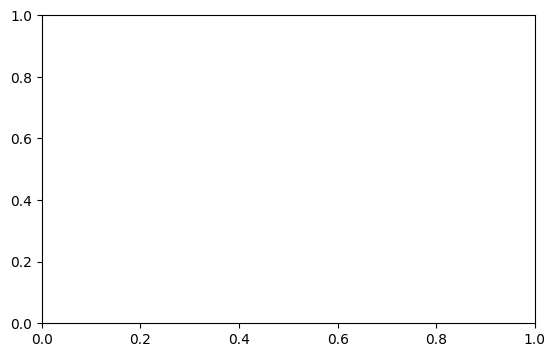

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)

<ipython-input-21-554d157a39e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((X_train['Age']),hist=False)


<Axes: xlabel='Age', ylabel='Density'>

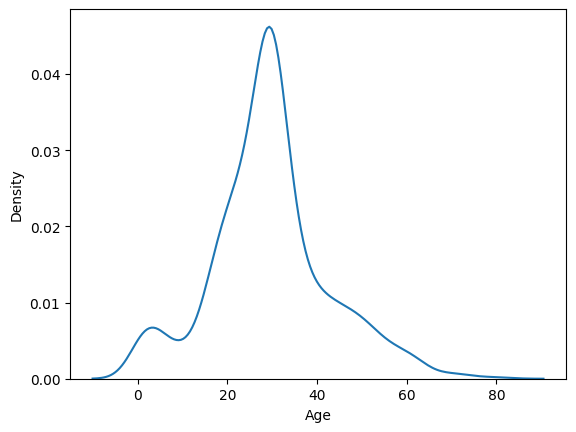

In [ ]:
sns.distplot((X_train['Age']))

<ipython-input-22-554d157a39e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((X_train['Age']),hist=False)


<Axes: xlabel='Age', ylabel='Density'>

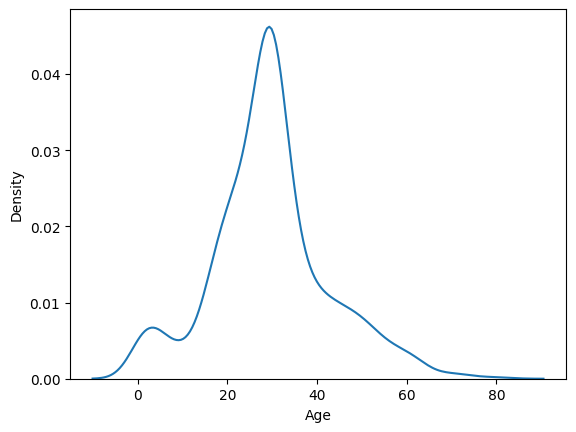

In [ ]:
sns.distplot((X_train['Age']),hist=False)

<ipython-input-24-987ce816ff45>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((X_train['Age']))


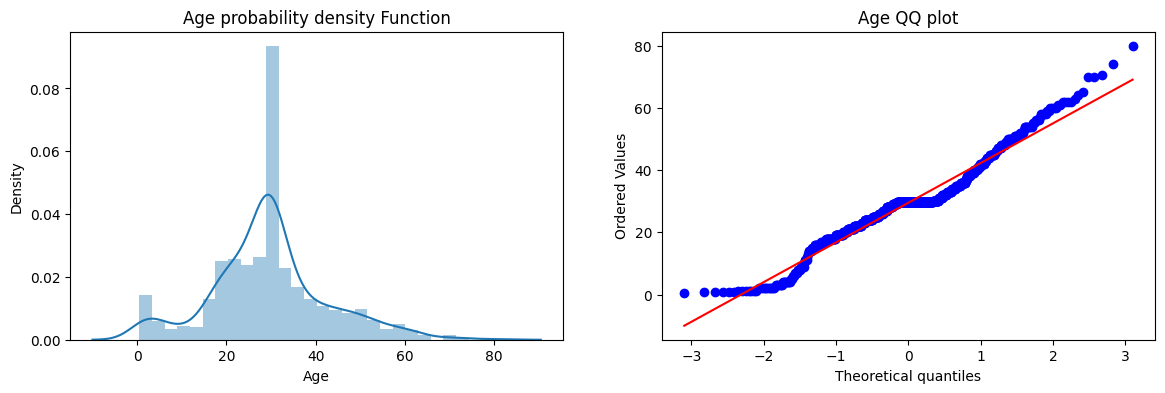

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot((X_train['Age']))
plt.title('Age probability density Function')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age QQ plot")
plt.show()


<ipython-input-27-40e2e20d9e65>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((X_train['Age']))


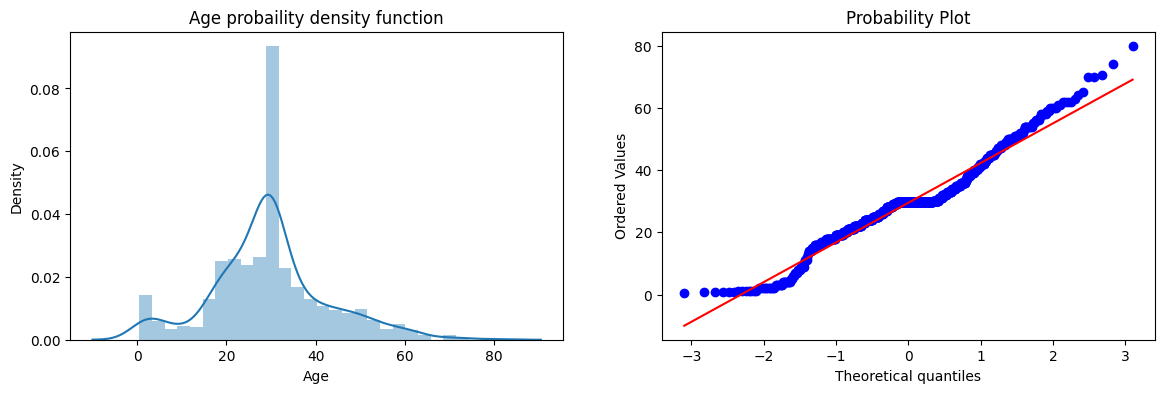

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Age probaility density function")
sns.distplot((X_train['Age']))

plt.subplot(122)
plt.title('Normal distribution using QQ plot')
plt.title("QQ Plot of Age")
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.show()

<ipython-input-29-2ac9da60d75a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((X_train['Fare']))


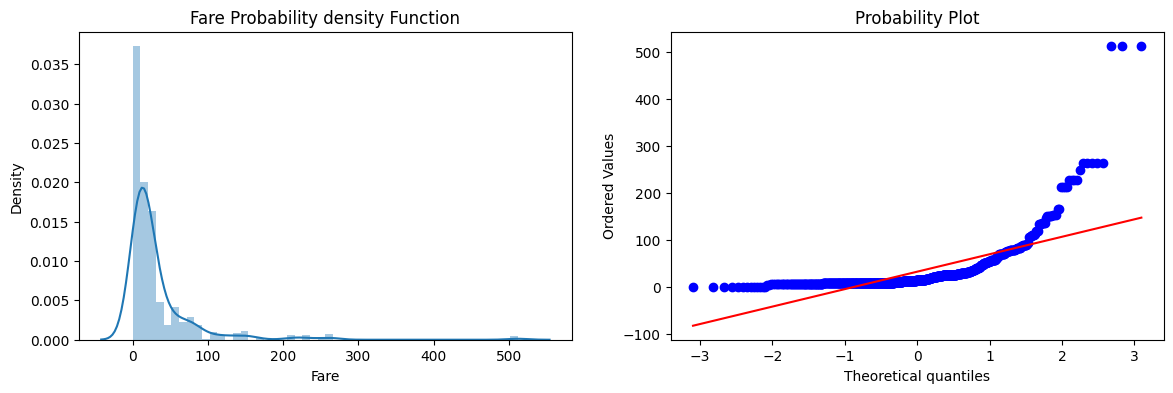

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Fare Probability density Function")
sns.distplot((X_train['Fare']))

plt.subplot(122)
plt.title('QQ plot for Fare')
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.show()

In [ ]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred)*100)
print("Accuracy of Decision Tree Classifier",accuracy_score(y_test,y_pred1)*100)

Accuracy of Logistic Regression 64.80446927374301
Accuracy of Decision Tree Classifier 69.27374301675978


In [ ]:
trf=FunctionTransformer(func=np.log1p)

In [ ]:
trf

FunctionTransformer(func=<ufunc 'log1p'>)

In [ ]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)

In [ ]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [ ]:
X_test

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417
...,...,...
433,17.000000,7.1250
773,29.699118,7.2250
25,38.000000,31.3875
84,17.000000,10.5000


In [ ]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

In [ ]:
print("Accuracy of Logistic Regression=",accuracy_score(y_test,y_pred)*100)
print("Accuracy of Decision Tree Classifiers",accuracy_score(y_test,y_pred1)*100)

Accuracy of Logistic Regression= 68.15642458100558
Accuracy of Decision Tree Classifiers 67.0391061452514


In [ ]:
X_transformed=trf.fit_transform(x)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
print("Logistic Regression=",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10))*100)
print("Decision Tree Classifier=",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10))*100)

Logistic Regression= 67.80274656679151
Decision Tree Classifier= 65.88389513108613


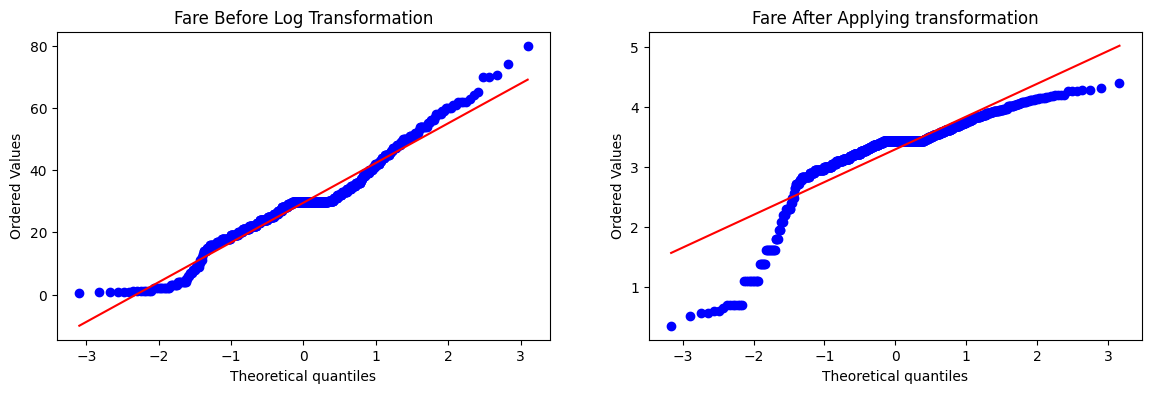

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Fare Before Log Transformation')

plt.subplot(122)
stats.probplot(X_transformed['Age'],dist="norm",plot=plt)
plt.title('Fare After Applying transformation')
plt.show()


In [ ]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [ ]:
X_train_transformed2=trf2.fit_transform(X_train)

In [ ]:
X_test_transformed2=trf2.transform(X_test)

In [ ]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test_transformed2)
y_pred2=clf2.predict(X_test_transformed2)

In [ ]:
#print("Logistic Regression",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
#print("Decision Tree Classifier",np.mean(cross_val_score(clf2,X_transformed2,y_scoring='accuracy',cv=10)))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
def apply_transform(transform):
  X=df.iloc[:,1:3]
  y=df.iloc[:,0]
  trf=ColumnTransformer(['log',FunctionTransformer(transform),['Fare']],remainder='passthrough')
  X_trans=trf.fit_transform(X)
  clf=LogisticRegression()
  print("Accuracy",np.mean(cross_val_Score(clf,X_trans,y,scoring='accuracy',cv=10)))
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X['Fare'],dist='norm',plot=plt)
  plt.title("Fare Before Transform")

  plt.subplot(122)
  stats.probplot(X_trans['Fare'],dist='norm',plot=plt)
  plt.title('Fare After Transform')

  plt.show()

#main function

In [89]:
apply_transform(lambda x:list(x))

TypeError: 'FunctionTransformer' object is not iterable